# OpenCV - Operations

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [7]:
def imshow(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [41]:
image = cv2.imread('./images/chihuahua.jpg')

## Transformations
```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)



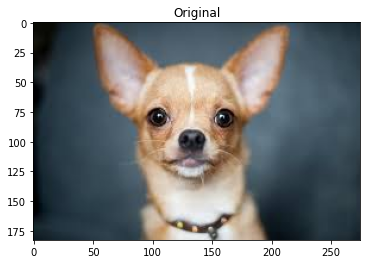

[[ 1.    0.   68.75]
 [ 0.    1.   45.75]]


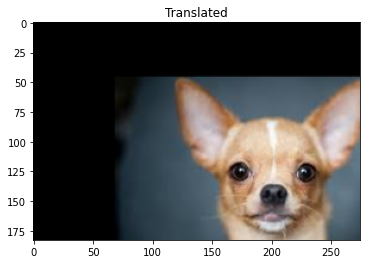

In [30]:
imshow("Original", image)
height, width = image.shape[:2]

# We shift it by quarter of the height and width
# Solo me va a quitar una cuarta parte
quarter_height, quarter_width = height/4, width/4


# Podemos transformat nuestra imagen
# si jugamos con los 0 y 1 le damos movimiento a la imagen
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
print(T)
imshow("Translated", img_translation)

### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)

para mas informacion ver https://github.com/ncostamagna/computer-vision/blob/master/2022-05-Modern-Computer-vision/OpenCV/5.%20Transformations%20-%20Translations%20and%20Rotations.ipynb

# Rotation

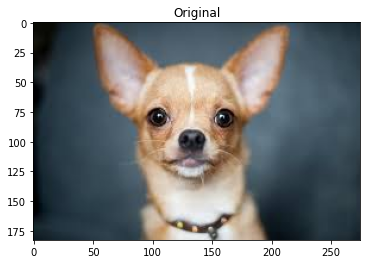

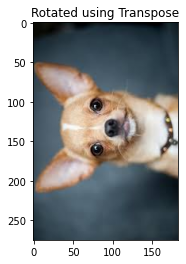

In [32]:
rotated_image = cv2.transpose(image) # menos flexible que getRotationMatrix2D
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

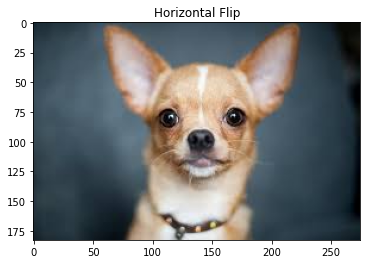

In [39]:
# rotacion espejo
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)

## Scaling & Resize

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale 

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

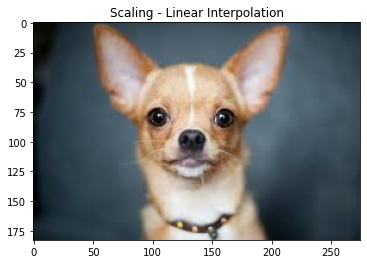

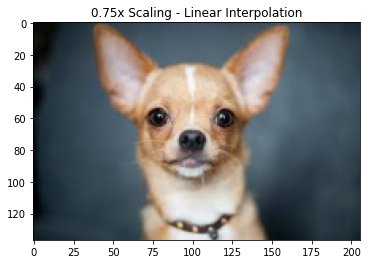

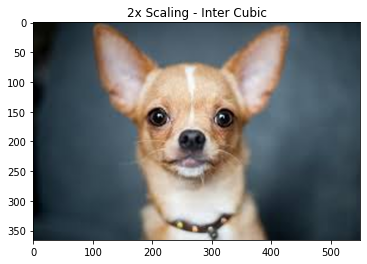

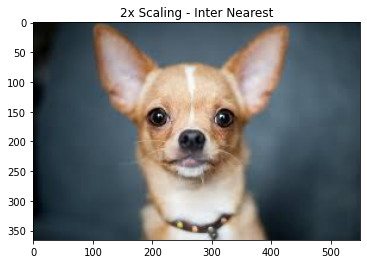

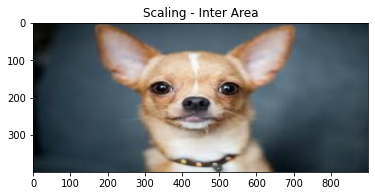

In [43]:
# load our input image
imshow("Scaling - Linear Interpolation", image)

# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

# Let's double the size of our image
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

# Let's double the size of our image using inter_nearest interpolation
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)

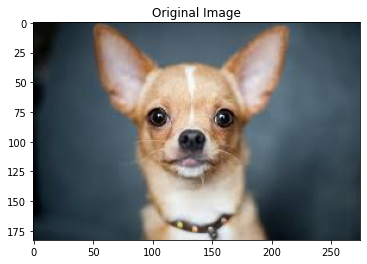

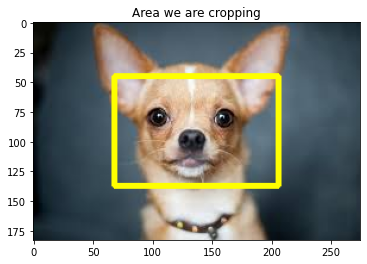

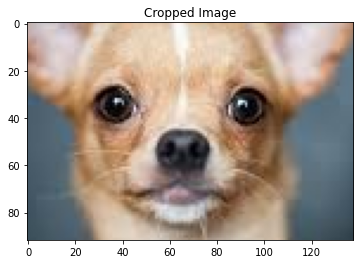

In [45]:
# Get our image dimensions
height, width = image.shape[:2]

# Donde arranca el rectangulo
start_row, start_col = int(height * .25), int(width * .25)
# Donde termina el rectangulo
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

imshow("Original Image", image)

# Dibujamos el rectangulo
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 3)
imshow("Area we are cropping", copy)

# Imagen recortada
imshow("Cropped Image", cropped) 

In [ ]:
## Blurring using Convolutions



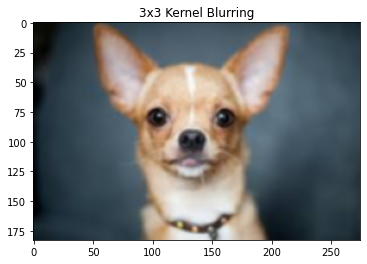

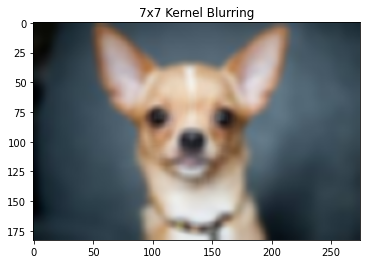

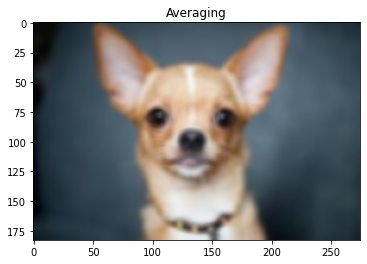

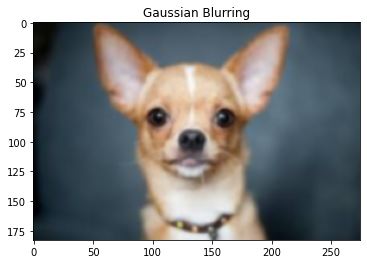

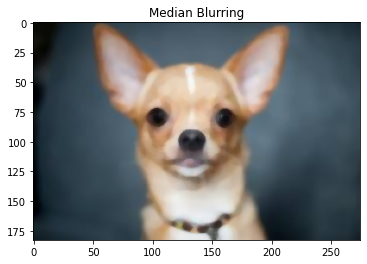

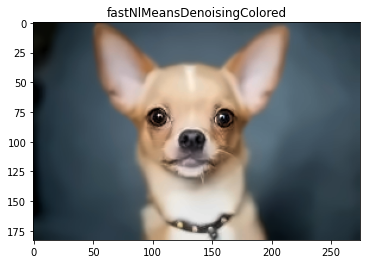

In [48]:
# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

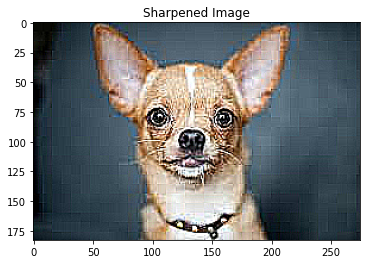

In [49]:
# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)